In [62]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [63]:
os.environ['KAGGLE_USERNAME'] = 'morbaenoma'
os.environ['KAGGLE_KEY'] = "fcf85e125cea448d18703f912fa7a8a2"

In [64]:
!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data

new-york-city-airbnb-open-data.zip: Skipping, found more recently modified local copy (use --force to force download)
new-york-city-airbnb-open-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip '*.zip'

Archive:  new-york-city-airbnb-open-data.zip
replace AB_NYC_2019.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [5]:
df = pd.read_csv('/content/AB_NYC_2019.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [8]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
(df['reviews_per_month'].isna() & df['last_review'].isna()).sum()

10052

In [10]:
df['reviews_per_month'].isna().sum()

10052

In [11]:
(df['number_of_reviews'] ==0).sum()

10052

In [12]:
df['reviews_per_month'].head()

0    0.21
1    0.38
2     NaN
3    4.64
4    0.10
Name: reviews_per_month, dtype: float64

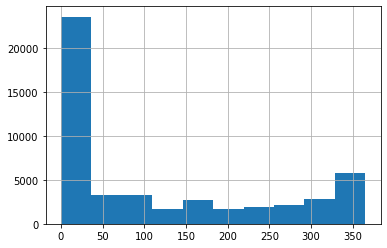

In [13]:
df['availability_365'].hist()

In [14]:
(df['availability_365'] ==0).sum()

17533

In [15]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [16]:
df.drop(['id', 'name','host_name', 'latitude', 'longitude'], axis=1, inplace=True)

In [17]:
df.head()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,4632,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [18]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

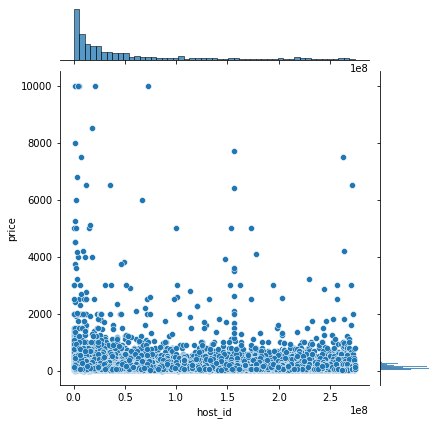

In [19]:
sns.jointplot(x='host_id', y='price',data=df)

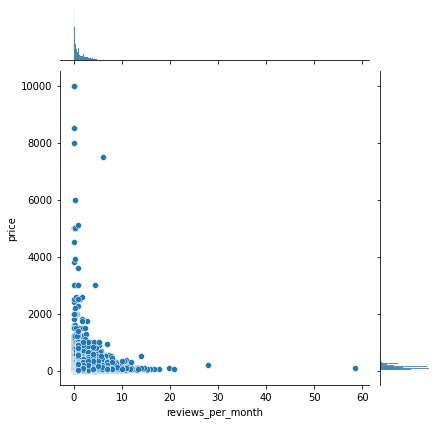

In [20]:
sns.jointplot(x='reviews_per_month', y='price', data= df)

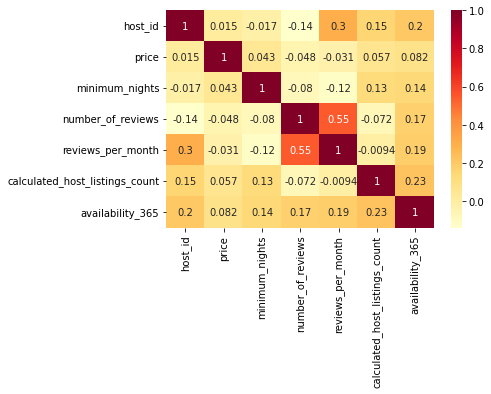

In [21]:
sns.heatmap(df.corr(), annot=True, cmap='YlOrRd')

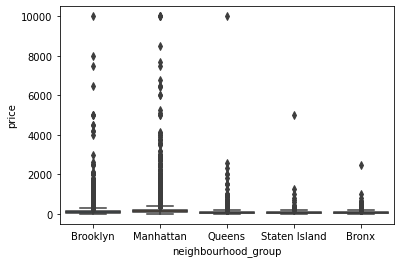

In [22]:
sns.boxplot(x='neighbourhood_group', y='price', data=df)

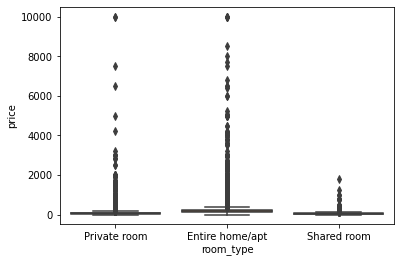

In [23]:
sns.boxplot(x='room_type', y='price', data=df)

In [24]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

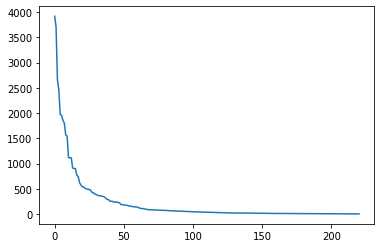

In [25]:
neigh= df['neighbourhood'].value_counts()
plt.plot(range(len(neigh)), neigh)

In [26]:
neigh.sort_values(ascending = False, inplace=True)
neigh

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [27]:
neigh.index[50:]

Index(['Boerum Hill', 'Tribeca', 'Kensington', 'Sheepshead Bay',
       'Windsor Terrace', 'Brooklyn Heights', 'Canarsie', 'Forest Hills',
       'Bay Ridge', 'Borough Park',
       ...
       'Howland Hook', 'Lighthouse Hill', 'Silver Lake', 'West Farms',
       'Woodrow', 'Fort Wadsworth', 'Richmondtown', 'New Dorp', 'Rossville',
       'Willowbrook'],
      dtype='object', length=171)

In [28]:
for nehood in range(len(df['neighbourhood'])):
  if str(df.iloc[nehood]['neighbourhood']) in neigh[50:]:
    df.at[nehood, 'neighbourhood'] = 'others'

In [29]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

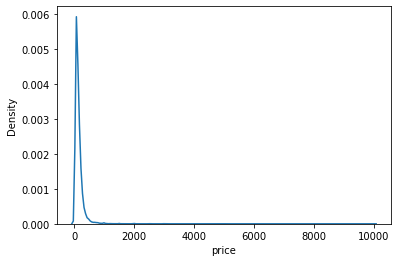

In [30]:
sns.kdeplot(x=df['price'])

In [31]:
print(df['price'])

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64


In [32]:
mn1 = df['minimum_nights'].quantile(0.98)

In [33]:
df =df[df['minimum_nights']<mn1]

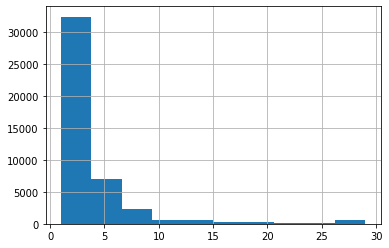

In [34]:
df['minimum_nights'].hist()

In [35]:
df['is_avail_zero'] = df['availability_365'].apply(lambda x : \
                                                   'Zero' if x==0 else 'Nonezero')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44388 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         44388 non-null  int64  
 1   neighbourhood_group             44388 non-null  object 
 2   neighbourhood                   44388 non-null  object 
 3   room_type                       44388 non-null  object 
 4   price                           44388 non-null  int64  
 5   minimum_nights                  44388 non-null  int64  
 6   number_of_reviews               44388 non-null  int64  
 7   last_review                     36103 non-null  object 
 8   reviews_per_month               36103 non-null  float64
 9   calculated_host_listings_count  44388 non-null  int64  
 10  availability_365                44388 non-null  int64  
 11  is_avail_zero                   44388 non-null  object 
dtypes: float64(1), int64(6), object(

In [37]:
df['reviw_exists'] = df['reviews_per_month'].isna().apply(lambda x: \
                                                          'No' if x is True else 'Yes')

In [38]:
df['reviw_exists']

0        Yes
1        Yes
2         No
3        Yes
4        Yes
        ... 
48890     No
48891     No
48892     No
48893     No
48894     No
Name: reviw_exists, Length: 44388, dtype: object

In [39]:
df['reviw_exists'].fillna(0)
df

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,is_avail_zero,reviw_exists
0,2787,Brooklyn,others,Private room,149,1,9,2018-10-19,0.21,6,365,Nonezero,Yes
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Nonezero,Yes
2,4632,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365,Nonezero,No
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Nonezero,Yes
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Zero,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaN,NaN,2,9,Nonezero,No
48891,6570630,Brooklyn,Bushwick,Private room,40,4,0,NaN,NaN,2,36,Nonezero,No
48892,23492952,Manhattan,Harlem,Entire home/apt,115,10,0,NaN,NaN,1,27,Nonezero,No
48893,30985759,Manhattan,Hell's Kitchen,Shared room,55,1,0,NaN,NaN,6,2,Nonezero,No


In [40]:
df['reviw_exists']= df['reviw_exists'].fillna(0)

In [41]:
df.fillna(0,inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44388 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         44388 non-null  int64  
 1   neighbourhood_group             44388 non-null  object 
 2   neighbourhood                   44388 non-null  object 
 3   room_type                       44388 non-null  object 
 4   price                           44388 non-null  int64  
 5   minimum_nights                  44388 non-null  int64  
 6   number_of_reviews               44388 non-null  int64  
 7   last_review                     44388 non-null  object 
 8   reviews_per_month               44388 non-null  float64
 9   calculated_host_listings_count  44388 non-null  int64  
 10  availability_365                44388 non-null  int64  
 11  is_avail_zero                   44388 non-null  object 
 12  reviw_exists                    

In [43]:
df

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,is_avail_zero,reviw_exists
0,2787,Brooklyn,others,Private room,149,1,9,2018-10-19,0.21,6,365,Nonezero,Yes
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Nonezero,Yes
2,4632,Manhattan,Harlem,Private room,150,3,0,0,0.00,1,365,Nonezero,No
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Nonezero,Yes
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Zero,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,0,0.00,2,9,Nonezero,No
48891,6570630,Brooklyn,Bushwick,Private room,40,4,0,0,0.00,2,36,Nonezero,No
48892,23492952,Manhattan,Harlem,Entire home/apt,115,10,0,0,0.00,1,27,Nonezero,No
48893,30985759,Manhattan,Hell's Kitchen,Shared room,55,1,0,0,0.00,6,2,Nonezero,No


In [44]:
def merge_and_get(ldf,rdf,on,how='inner',index=None):
  if index is True:
    return pd.merge(ldf,rdf, how=how, left_index=True,
                    right_index=True)
  else:
    return pd.merge(ldf,rdf,how=how,on=on)

In [45]:
df1 = merge_and_get(df, pd.get_dummies(df['calculated_host_listings_count'], prefix='calculated_host_listings_count'),on=None, index=True)
df1 = merge_and_get(df1, pd.get_dummies(df['is_avail_zero'], prefix='is_avail_zero'),on=None, index=True)
df1 = merge_and_get(df1, pd.get_dummies(df['reviw_exists'], prefix='reviw_exists'),on=None, index=True)

In [46]:
df2 = merge_and_get(df, pd.get_dummies(df['is_avail_zero'], prefix='is_avail_zero'),on=None, index=True)
df2 = merge_and_get(df2, pd.get_dummies(df['reviw_exists'], prefix='reviw_exists'),on=None, index=True)

In [47]:
df2.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'is_avail_zero', 'reviw_exists',
       'is_avail_zero_Nonezero', 'is_avail_zero_Zero', 'reviw_exists_No',
       'reviw_exists_Yes'],
      dtype='object')

In [48]:
df3 = merge_and_get(df, pd.get_dummies(df['neighbourhood_group'], prefix='neighbourhood_group'),on=None, index=True)
df3 = merge_and_get(df3, pd.get_dummies(df['neighbourhood'], prefix='neighbourhood'),on=None, index=True)
df3 = merge_and_get(df3, pd.get_dummies(df['room_type'], prefix='room_type'),on=None, index=True)
df3 = merge_and_get(df3, pd.get_dummies(df['is_avail_zero'], prefix='is_avail_zero'),on=None, index=True)
df3 = merge_and_get(df3, pd.get_dummies(df['reviw_exists'], prefix='reviw_exists'),on=None, index=True)

In [49]:
df3.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'is_avail_zero', 'reviw_exists',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'neighbourhood_Astoria',
       'neighbourhood_Bedford-Stuyvesant', 'neighbourhood_Bushwick',
       'neighbourhood_Carroll Gardens', 'neighbourhood_Chelsea',
       'neighbourhood_Chinatown', 'neighbourhood_Clinton Hill',
       'neighbourhood_Crown Heights', 'neighbourhood_Ditmars Steinway',
       'neighbourhood_East Elmhurst', 'neighbourhood_East Flatbush',
       'neighbourhood_East Harlem', 'neighbourhood_East New York',
       'neighbourhood_East Village', 'neighbourhood_Elmhurst',
       'neighbourhood_Financial District', 'neighbourhood_Fla

In [50]:
df4 = merge_and_get(df, pd.get_dummies(df['neighbourhood_group'], prefix='neighbourhood_group'),on=None, index=True)
df4 = merge_and_get(df4, pd.get_dummies(df['neighbourhood'], prefix='neighbourhood'),on=None, index=True)
df4 = merge_and_get(df4, pd.get_dummies(df['room_type'], prefix='room_type'),on=None, index=True)
df4 = merge_and_get(df4, pd.get_dummies(df['is_avail_zero'], prefix='is_avail_zero'),on=None, index=True)
df4 = merge_and_get(df4, pd.get_dummies(df['reviw_exists'], prefix='reviw_exists'),on=None, index=True)

In [51]:
print(df4.columns)

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'is_avail_zero', 'reviw_exists',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'neighbourhood_Astoria',
       'neighbourhood_Bedford-Stuyvesant', 'neighbourhood_Bushwick',
       'neighbourhood_Carroll Gardens', 'neighbourhood_Chelsea',
       'neighbourhood_Chinatown', 'neighbourhood_Clinton Hill',
       'neighbourhood_Crown Heights', 'neighbourhood_Ditmars Steinway',
       'neighbourhood_East Elmhurst', 'neighbourhood_East Flatbush',
       'neighbourhood_East Harlem', 'neighbourhood_East New York',
       'neighbourhood_East Village', 'neighbourhood_Elmhurst',
       'neighbourhood_Financial District', 'neighbourhood_Fla

In [52]:
x_cat = df[['neighbourhood_group', 'neighbourhood','room_type','is_avail_zero','reviw_exists'  ]]
x_cat = pd.get_dummies(x_cat)
x_cat.head() #원핫코딩

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Astoria,neighbourhood_Bedford-Stuyvesant,neighbourhood_Bushwick,neighbourhood_Carroll Gardens,neighbourhood_Chelsea,...,neighbourhood_Williamsburg,neighbourhood_Woodside,neighbourhood_others,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,is_avail_zero_Nonezero,is_avail_zero_Zero,reviw_exists_No,reviw_exists_Yes
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'is_avail_zero', 'reviw_exists'],
      dtype='object')

In [55]:
scaler = StandardScaler()
x_num = df.drop(['neighbourhood_group','neighbourhood','room_type','price',
                'last_review','is_avail_zero', 'reviw_exists'],axis=1)

scaler.fit(x_num)
x_scaled = scaler.transform(x_num)
x_scaled = pd.DataFrame(x_scaled, index=x_num.index, columns=x_num.columns)

x= pd.concat([x_scaled, x_cat], axis=1)
y = df['price']

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

print('train data 개수' , X_train.shape)
print(X_test.shape)

train data 개수 (31071, 69)
(13317, 69)


In [57]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

print('원 데이터', X_train.shape)
print('2차항 변환 데이터',X_train_poly.shape)


원 데이터 (31071, 69)
2차항 변환 데이터 (31071, 2485)


In [58]:
from sklearn.linear_model import LinearRegression
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

LinearRegression()

In [59]:
X_test_poly =poly.fit_transform(X_test)

r_square = pr.score(X_test_poly, y_test)
r_square

0.18283309951796367

In [60]:
y_hat = pr.predict(X_test_poly)

df_y_test  = pd.DataFrame({'y_hat':y_hat, 'y':y_test})
df_y_test['차이'] = df_y_test['y_hat'] - df_y_test['y']
df_y_test 

,y_hat,y,차이
31861,61.010014,50,11.010014
46248,213.766403,99,114.766403
37872,190.273201,139,51.273201
15748,53.859917,85,-31.140083
12632,102.986622,95,7.986622
...,...,...,...
22514,72.319672,115,-42.680328
4305,84.306137,69,15.306137
32420,24.551285,100,-75.448715
6693,121.268990,85,36.268990


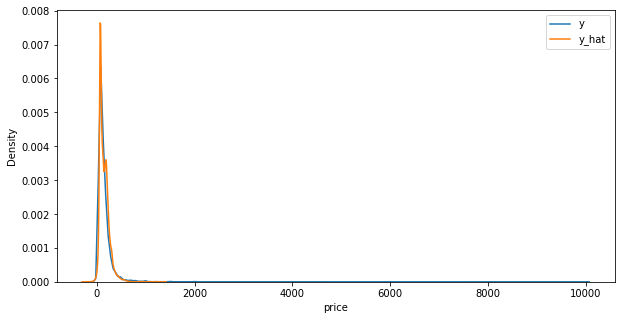

In [61]:
X_poly = poly.fit_transform(x)
y_hat = pr.predict(X_poly)

plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y,label='y')
ax2 = sns.kdeplot(y_hat, label='y_hat', ax=ax1)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt